## logic:
- take a video
- crop the video in images in 10 second gaps
- input images in the transformer and store the captions in a list.
- use a text to audio model.

In [1]:
# !pip install sounddevice
# !pip install PortAudio

In [13]:
import numpy as np
# import sounddevice as sd
import glob
import skimage
from skimage import io
import matplotlib.pyplot as plt

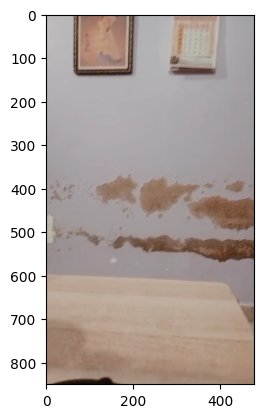

In [14]:

path='/kaggle/input/blind-guidance/1.png'
image=io.imread(path)
i,(im1)=plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

In [3]:
from transformers import pipeline

synthesizer = pipeline("text-to-speech", "suno/bark")

from transformers import pipeline

captioner = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")


2025-07-05 00:40:11.400521: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751676011.612897      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751676011.669966      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/4.49G [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


In [4]:

a= captioner("https://images.ctfassets.net/hrltx12pl8hq/28ECAQiPJZ78hxatLTa7Ts/2f695d869736ae3b0de3e56ceaca3958/free-nature-images.jpg?fit=fill&w=1200&h=630")

In [20]:
i=1
test_image=captioner(f'/kaggle/input/blind-guidance/{i}.png')

In [21]:
test_image

[{'generated_text': 'a man is sitting on a couch in a room'}]

In [24]:
result=[]
for i in range(1,10):
    result.append(captioner(f'/kaggle/input/blind-guidance/{i}.png'))

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [25]:
result

[[{'generated_text': 'a man is sitting on a couch in a room'}],
 [{'generated_text': 'a man is standing in front of a wall with a hole'}],
 [{'generated_text': 'a man is sitting on a chair in front of a wall with mold'}],
 [{'generated_text': 'a cat is sitting on a table in a room'}],
 [{'generated_text': 'a man is standing in front of a wall with a large hole'}],
 [{'generated_text': 'a man is standing in front of a wall with a hole'}],
 [{'generated_text': 'a man is standing in front of a wall with mold'}],
 [{'generated_text': 'a man is standing in front of a wall with mold'}],
 [{'generated_text': 'a man is standing in front of a wall with mold'}]]

In [5]:
a

[{'generated_text': 'a lone tree in a green field under a blue sky'}]

In [6]:
b=a[0]['generated_text']

In [7]:
type(b)

str

In [8]:
synthesizer(b)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


{'audio': array([[ 1.9659111e-03,  1.7912867e-03,  1.9672504e-03, ...,
          4.9398106e-04, -5.8913487e-05, -6.8266899e-04]], dtype=float32),
 'sampling_rate': 24000}

In [9]:
direction= synthesizer("Look I am generating speech in three lines of code!")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [10]:
print(type(wave_audio),type(dir_value))

NameError: name 'wave_audio' is not defined

In [ ]:
dir_value=direction['audio']

In [ ]:
from IPython.display import Audio
wave_audio = np.sin(np.linspace(0, 3000, 20000))
Audio(dir_value, rate=20000)
